## 一个回归和分类的问题

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_data = np.linspace(-0.5,0.5,10)
print(x_data)
print(type(x_data))

[-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
  0.16666667  0.27777778  0.38888889  0.5       ]
<class 'numpy.ndarray'>


In [5]:
help(np.linspace)#就是均匀分割

In [7]:
x1 = x_data[:,np.newaxis]
print(x1)
x2 = x_data[np.newaxis,:]
print(x2)
print(type(x1))

[[-0.5       ]
 [-0.38888889]
 [-0.27777778]
 [-0.16666667]
 [-0.05555556]
 [ 0.05555556]
 [ 0.16666667]
 [ 0.27777778]
 [ 0.38888889]
 [ 0.5       ]]
[[-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]]
<class 'numpy.ndarray'>


##### 1. 简单来说np.newaxis 为 numpy.ndarray（多维数组）增加一个轴，参考：
##### https://blog.csdn.net/lanchunhui/article/details/49725065

In [10]:
n1 = np.random.normal(0,0.2,x1.shape)
print(n1)

[[-0.24059012]
 [ 0.1571822 ]
 [ 0.04294684]
 [-0.26286666]
 [ 0.01026803]
 [-0.13135642]
 [ 0.22983657]
 [-0.06670963]
 [ 0.14442302]
 [ 0.2878075 ]]


##### 均值为0方差为0.2的正态分布，形状还能这样用，真的6哇

In [3]:
tf.random_normal([1,10])

<tf.Tensor 'random_normal:0' shape=(1, 10) dtype=float32>

##### 这个函数生成的是一个1行10列的形状

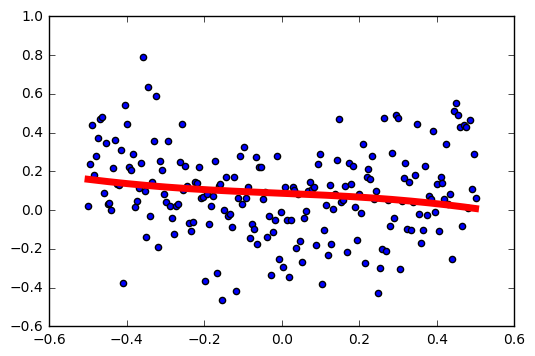

In [17]:
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32,[None,1])##None表示，行数不确定
y = tf.placeholder(tf.float32,[None,1])

Weights = tf.Variable(tf.random_normal([1,10]))
biases = tf.Variable(tf.zeros([1,10]))
L1Out = tf.nn.tanh(tf.matmul(x,Weights) + biases)

Weights2 = tf.Variable(tf.random_normal([10,1]))
biases2 = tf.Variable(tf.zeros([1,1]))
y_out = tf.nn.tanh(tf.matmul(L1Out,Weights2) + biases2)

loss = tf.reduce_mean(tf.square(y - y_out))

tain = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(10):
        sess.run(tain,feed_dict={x:x_data,y:y_data})
    
    prediction = sess.run(y_out,feed_dict={x:x_data})
    
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction,'r-',lw=5)
    plt.show()